In [7]:
class Node:
    def __init__(self, kata, arti):
        self.kata = kata
        self.arti = arti
        self.left = None
        self.right = None
class DictionaryBST:
    def __init__(self):
        self.root = None
        self.file_name = "Data.txt"
        self.load_from_file()
    
    def load_from_file(self):
        try:
            with open(self.file_name, "r") as file:
                lines = file.readlines()[1:] 
                entries = []
                for line in lines:
                    if ":" in line:
                        kata, arti = line.strip().split(":", 1)
                        entries.append((kata.strip(), arti.strip()))
                entries.sort(key=lambda x: x[0])
                self.root = self._build_balanced_bst(entries)
        except FileNotFoundError:
            print("Peringatan: File tidak ditemukan, membuat baru!")
    
    def _build_balanced_bst(self, entries):
        if not entries:
            return None
        mid = len(entries) // 2
        kata, arti = entries[mid]
        node = Node(kata, arti)
        node.left = self._build_balanced_bst(entries[:mid])
        node.right = self._build_balanced_bst(entries[mid+1:])
        return node
    
    
    def save_to_file(self):
        with open(self.file_name, "w") as file:
            file.write("KATA -  Arti\n")
            self._in_order_traversal_write(self.root, file)
    
    def _in_order_traversal_write(self, node, file):
        if node:
            self._in_order_traversal_write(node.left, file)
            file.write(f"{node.kata}:{node.arti}\n")
            self._in_order_traversal_write(node.right, file)
    
    def insert(self, kata, arti):
        new_node = Node(kata, arti)
        if not self.root:
            self.root = new_node
        else:
            self._insert(self.root, new_node)
        self.save_to_file()
    
    def _insert(self, current, new_node):
        if new_node.kata < current.kata:
            if not current.left:
                current.left = new_node
            else:
                self._insert(current.left, new_node)
        elif new_node.kata > current.kata:
            if not current.right:
                current.right = new_node
            else:
                self._insert(current.right, new_node)
        else:
            current.arti = new_node.arti
    
    def search(self, kata):
        return self._search(self.root, kata)
    
    def _search(self, current, kata):
        if not current:
            print (current.kata)
            return None
        if kata == current.kata:
            print (current.arti)
            return current.arti
        elif kata < current.kata:
            print (current.kata)
            return self._search(current.left, kata)
        else:
            print (current.kata)
            return self._search(current.right, kata)
    def delete(self, kata):
        self.root = self._delete(self.root, kata)
        self.save_to_file()
    
    def _delete(self, node, kata):
        if not node:
            return node
        if kata < node.kata:
            node.left = self._delete(node.left, kata)
        elif kata > node.kata:
            node.right = self._delete(node.right, kata)
        else:
            if not node.left:
                return node.right
            elif not node.right:
                return node.left
            temp = self._find_min(node.right)
            node.kata = temp.kata
            node.arti = temp.arti
            node.right = self._delete(node.right, temp.kata)
        return node
    
    def _find_min(self, node):
        current = node
        while current.left:
            current = current.left
        return current

kamus = DictionaryBST()

In [8]:
hasil_cari = kamus.search("YGY")
if hasil_cari:
    print(f": {hasil_cari}")
else:
    print("Kata tidak ditemukan!")


KUDET
PANSOS
STALKING
TRUST ISSUE
Ya gaes ya
: Ya gaes ya


In [9]:
kamus.insert("Alamak", "Pasrah / Terkejut")
print("Kata berhasil ditambahkan!")

Kata berhasil ditambahkan!


In [10]:
kamus.delete("BTW")
print("Kata berhasil dihapus!")

Kata berhasil dihapus!


In [11]:
kamus.save_to_file()
print("Data disimpan ke file!")


Data disimpan ke file!


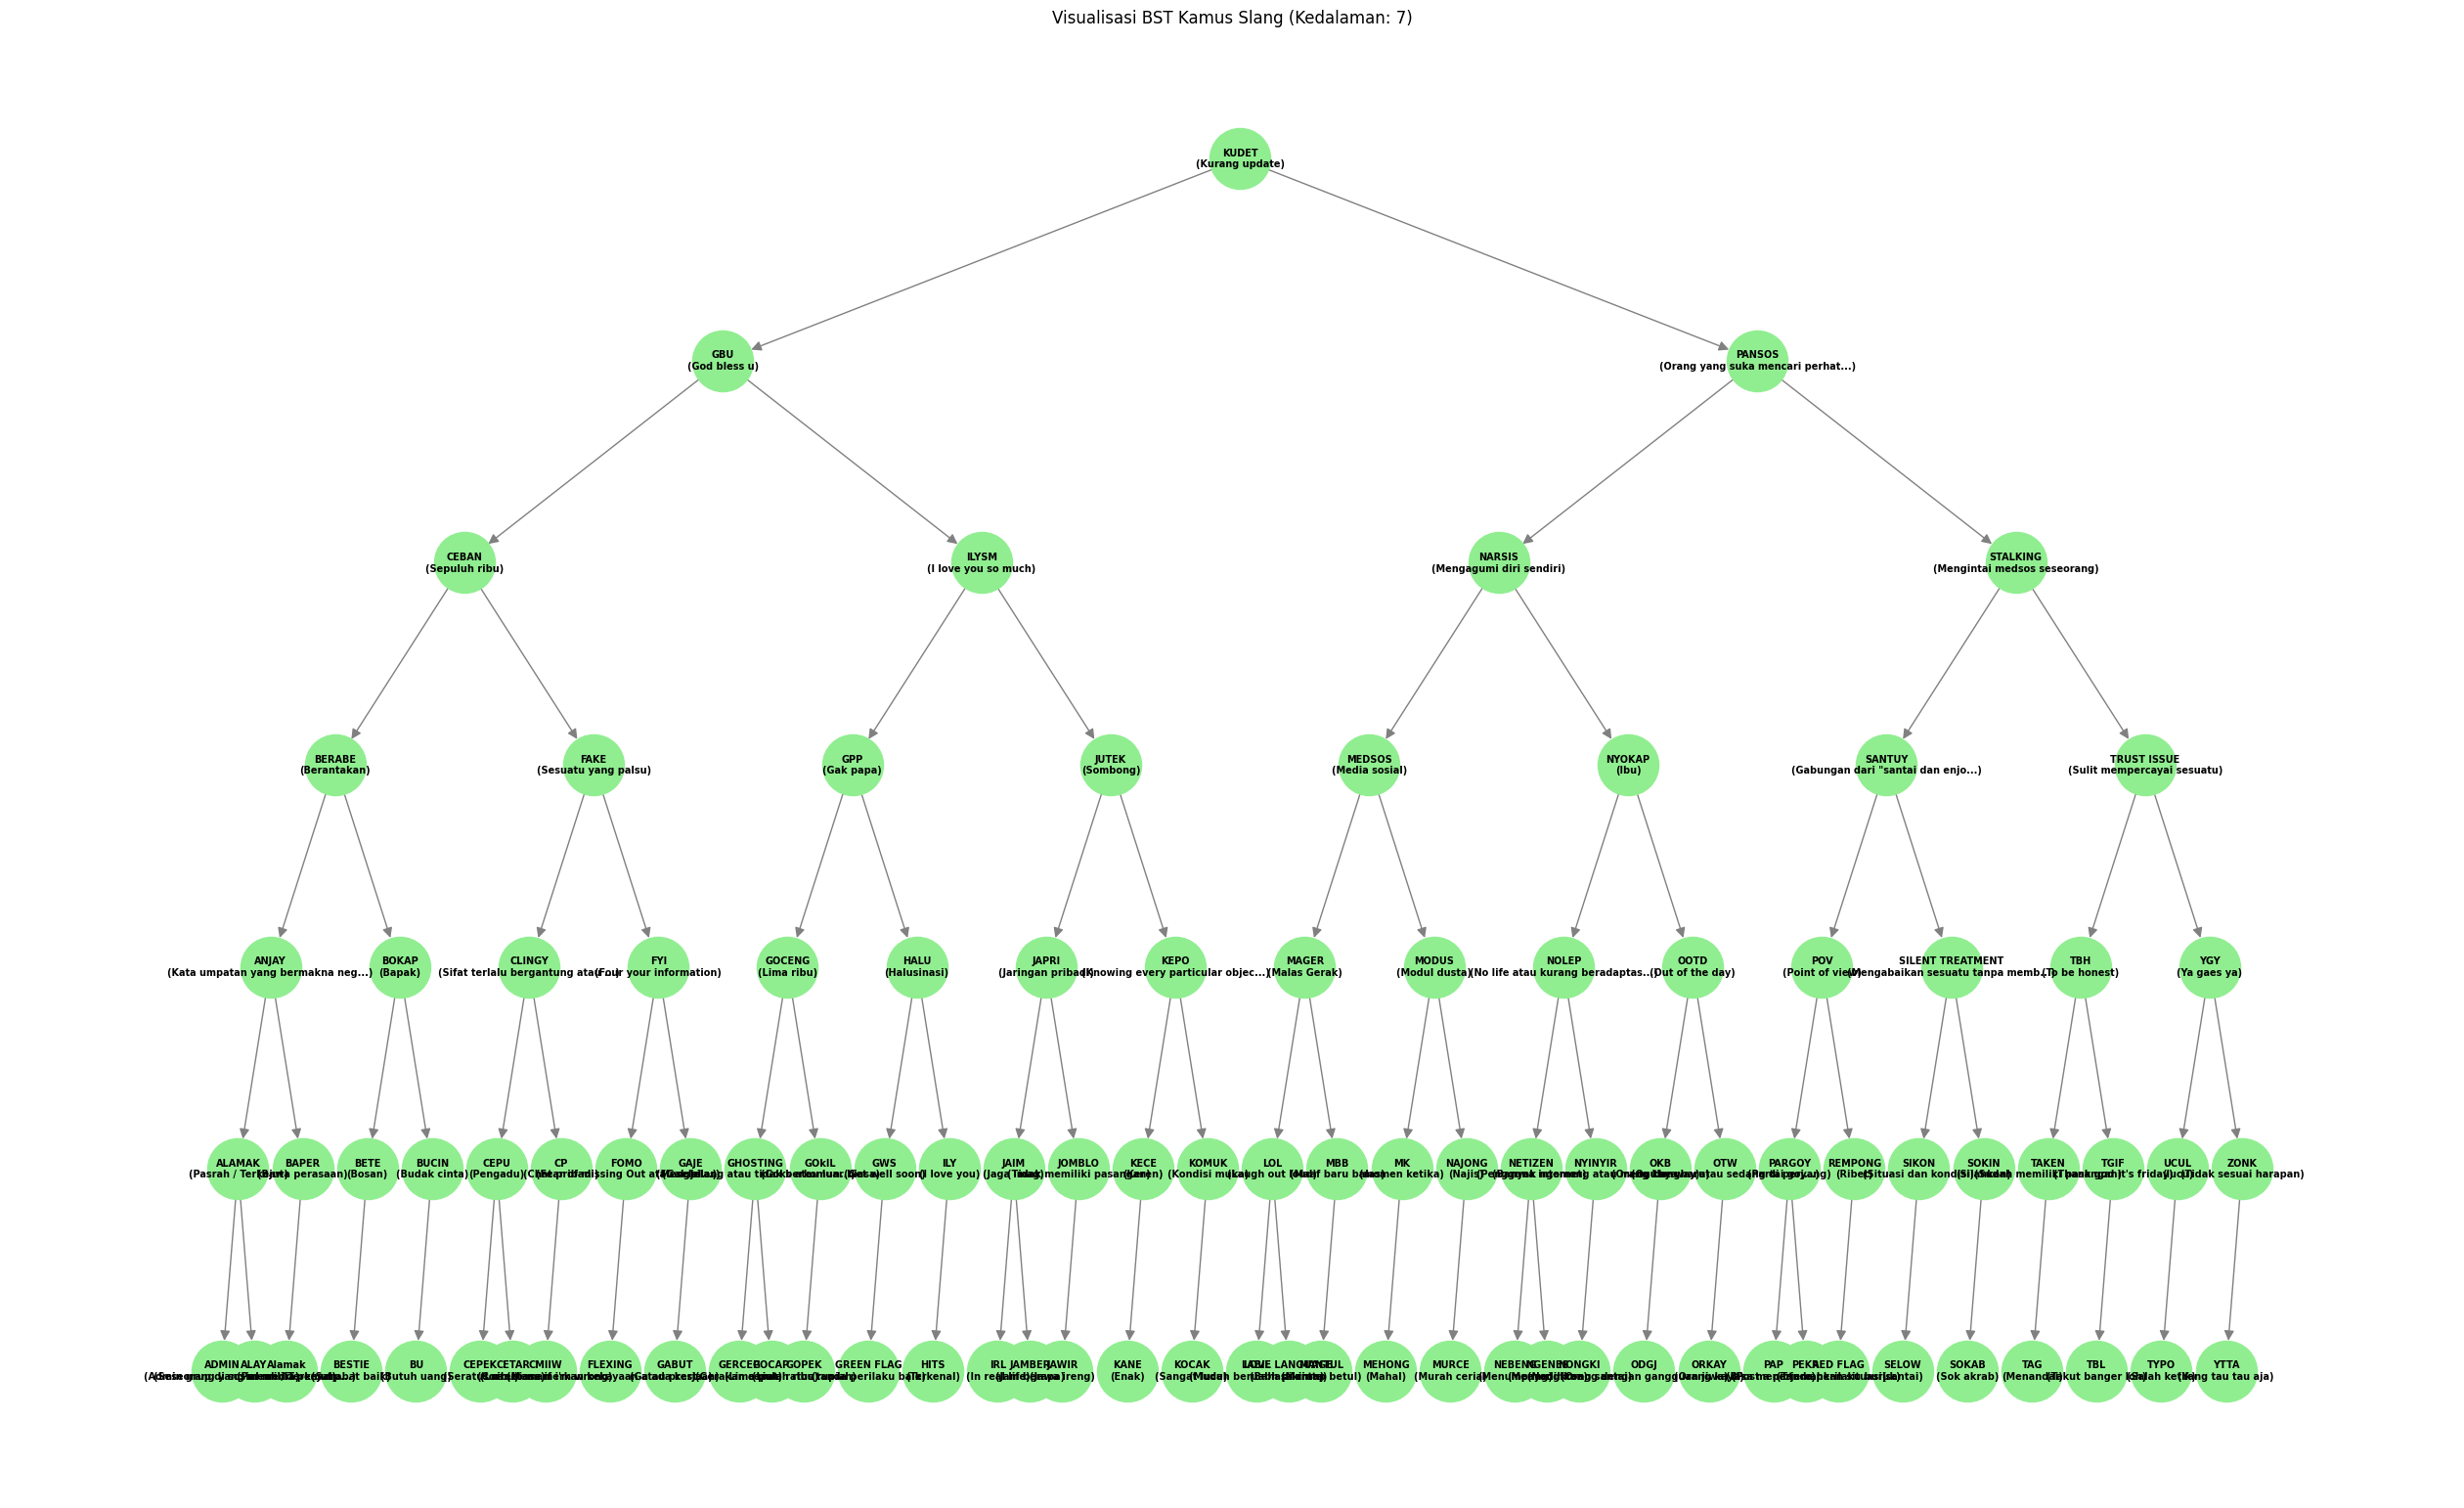

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

class Visualizer:
    def __init__(self, bst):
        self.bst = bst
    
    def visualize(self):
        G = nx.DiGraph()
        pos = {}
        
        if not self.bst.root:
            print("Pohon kosong")
            return

        max_depth = self._calculate_depth(self.bst.root)
        
        def _place_nodes(node, x, y, dx):
            if node:
                pos[node.kata] = (x, -y)
                if node.left:
                    _place_nodes(node.left, x - dx/2, y + 1, dx/2)
                if node.right:
                    _place_nodes(node.right, x + dx/2, y + 1, dx/2)
        
        _place_nodes(self.bst.root, 0, 0, 2 ** (max_depth - 1))

        queue = deque([self.bst.root])
        while queue:
            node = queue.popleft()
            G.add_node(node.kata, arti=node.arti)
            if node.left:
                G.add_edge(node.kata, node.left.kata)
                queue.append(node.left)
            if node.right:
                G.add_edge(node.kata, node.right.kata)
                queue.append(node.right)
        
        plt.figure(figsize=(25, 15))
        node_labels = {
            node: f"{node}\n({(data['arti'][:30] + '...') if len(data['arti']) > 30 else data['arti']})" 
            for node, data in G.nodes(data=True)
        }
        
        nx.draw(
            G, pos, 
            with_labels=True, 
            labels=node_labels, 
            node_size=2000, 
            node_color='lightgreen', 
            font_size=7, 
            font_weight='bold', 
            arrowsize=15, 
            edge_color='gray'
        )
        plt.title(f"Visualisasi BST Kamus Slang (Kedalaman: {max_depth})")
        plt.show()
    
    def _calculate_depth(self, node):
        if not node:
            return 0
        return max(self._calculate_depth(node.left), self._calculate_depth(node.right)) + 1

visualizer = Visualizer(kamus)
visualizer.visualize()